In [1]:
import numpy as np


In [2]:
import pandas as pd


In [3]:
import matplotlib.pyplot as plt


In [4]:
import matplotlib.pyplot as plt


In [5]:
import seaborn as sns


In [6]:
np.random.seed(42)



In [7]:
apartments = [f"Apt_{i}" for i in range(1, 21)]



In [8]:
dates = pd.date_range(start="2025-07-01", periods=30, freq="D")



In [9]:
data = {
    "Date": np.tile(dates, len(apartments)),
    "Apartment": np.repeat(apartments, len(dates)),
    "Electricity_usage": np.random.normal(loc=20, scale=5, size=len(dates) * len(apartments))
}


In [10]:
df = pd.DataFrame(data)



In [11]:
print(df.isnull().sum())


Date                 0
Apartment            0
Electricity_usage    0
dtype: int64


In [12]:
print(df.describe())


                      Date  Electricity_usage
count                  600         600.000000
mean   2025-07-15 12:00:00          19.932404
min    2025-07-01 00:00:00           3.793663
25%    2025-07-08 00:00:00          16.526932
50%    2025-07-15 12:00:00          20.038692
75%    2025-07-23 00:00:00          23.115837
max    2025-07-30 00:00:00          39.263657
std                    NaN           4.860957


In [16]:
usage_per_apartment = df.groupby("Apartment")["Electricity_usage"].sum().sort_values(ascending=False)
print(usage_per_apartment)


Apartment
Apt_11    642.282391
Apt_6     641.817993
Apt_13    634.225898
Apt_10    616.074819
Apt_20    613.164300
Apt_7     609.838848
Apt_8     607.205434
Apt_16    606.985293
Apt_14    604.314773
Apt_3     601.932716
Apt_4     596.962256
Apt_15    591.394231
Apt_19    586.585246
Apt_5     585.756283
Apt_2     581.825629
Apt_9     578.485218
Apt_1     571.777966
Apt_17    570.315585
Apt_12    569.016727
Apt_18    549.480581
Name: Electricity_usage, dtype: float64


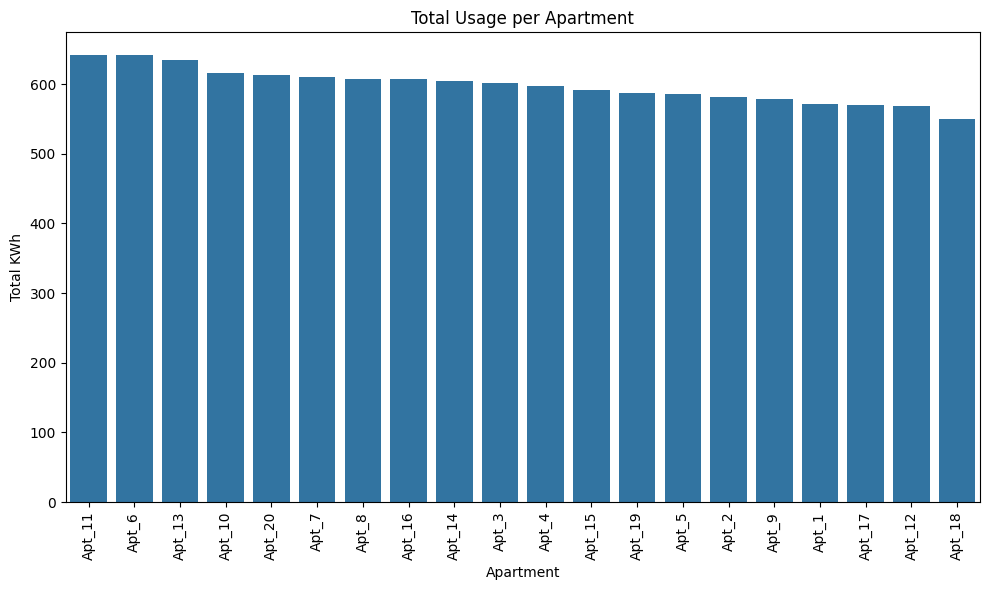

In [17]:

plt.figure(figsize=(10, 6))
sns.barplot(x=usage_per_apartment.index, y=usage_per_apartment.values)
plt.xticks(rotation=90)
plt.title("Total Usage per Apartment")
plt.xlabel("Apartment")
plt.ylabel("Total KWh")
plt.tight_layout()
plt.show()


In [18]:
daily_avg = df.groupby("Date")["Electricity_usage"].mean()
print(daily_avg.head())



Date
2025-07-01    21.043539
2025-07-02    20.870132
2025-07-03    19.567646
2025-07-04    20.985517
2025-07-05    19.782940
Name: Electricity_usage, dtype: float64


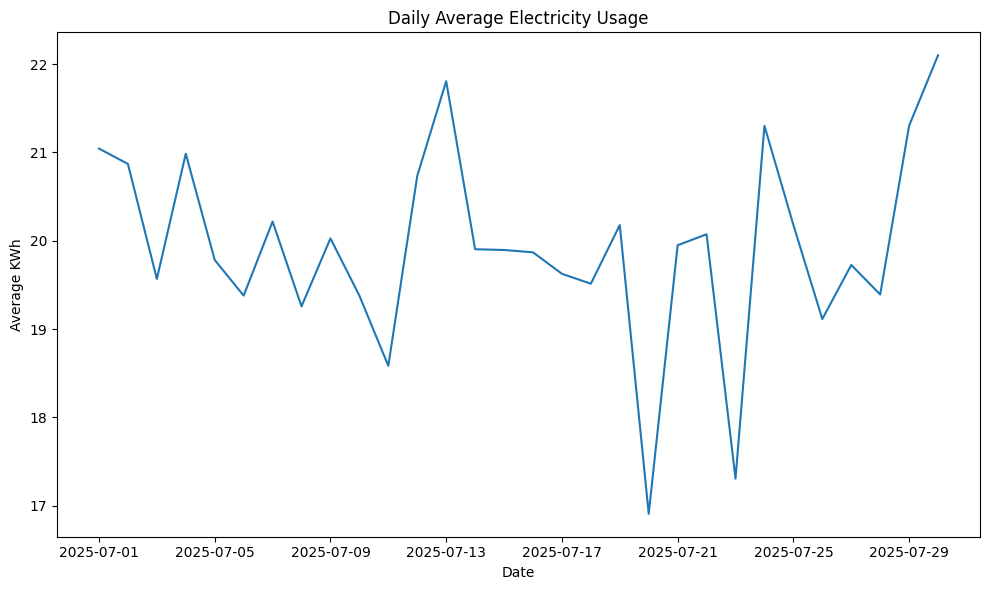

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_avg.index, y=daily_avg.values)
plt.title("Daily Average Electricity Usage")
plt.xlabel("Date")
plt.ylabel("Average KWh")
plt.tight_layout()
plt.show()